In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [2]:
sales = pd.read_csv('data/01 Sales Data.csv', index_col='Insta Username')
event = pd.read_csv('data/3blondedogs.csv')

In [3]:
sales.head()

,Date Campaign Ended,Campaign Name,Amount Raised,Charity,Followers,Instagram URL
Insta Username,,,,,,
chinnybuddy,2/13/15,Mr Bagel Ankle Socks,432,Mr Bagel Instagram,88134,https://instagram.com/chinnybuddy/
otterthepitbull,3/20/15,Otter the Pit Bull Socks,543.5,Otter the Pit Bull Instagram,10941,https://instagram.com/otterthepitbull/
piratethefrenchie,4/9/15,Pirate the Frenchy Socks,2676,Pirate the Frenchie Instagram,11109,https://instagram.com/piratethefrenchie/
chickopug,4/14/15,Chicko Pug Socks,323.5,Chicko Pug Instagram,20678,https://instagram.com/chickopug/
prairiedogpack,4/30/15,Bing Prairie Dog Socks,945.25,Bing Prairie Dog Instagram,43923,https://instagram.com/prairiedogpack/


In [4]:
event.head()

,image url,id,likes,num comments,shares,likes + comment /shares
0,https://scontent.cdninstagram.com/hphotos-xaf1...,1018209090011549326_1261998474,350,9,6,59.833333
1,https://scontent.cdninstagram.com/hphotos-xaf1...,1017067178491792738_1261998474,664,9,0,0.000000
2,https://scontent.cdninstagram.com/hphotos-xaf1...,1017064389279632657_1261998474,665,3,0,0.000000
3,https://scontent.cdninstagram.com/hphotos-xfa1...,1017058635223026827_1261998474,630,7,5,127.400000
4,https://scontent.cdninstagram.com/hphotos-xfa1...,1016178560906710836_1261998474,752,6,5,151.600000


In [5]:
event_sum = event[['likes', 'num comments', 'shares', 'likes + comment /shares']].sum()
event_sum['total_images'] = event.count()[0]
event_sum

likes                      22265.000000
num comments                 471.000000
shares                        83.000000
likes + comment /shares     6821.366667
total_images                  33.000000
dtype: float64

In [6]:
insta = sales.index.tolist()

In [20]:
event_df = pd.DataFrame(columns=['name', 'likes', 'num comments', 'shares', 'likes + comment /shares', 
                                 'total_images', 'amount_raised', 'followers'])

for i, user in enumerate(insta):
    file_name = 'data/' + user + '.csv'
    event = pd.read_csv(file_name)
    event_sum = event[['likes', 'num comments', 'shares', 'likes + comment /shares']].sum()
    event_sum['name'] = user
    event_sum['total_images'] = event.count()[0]
    sales_user = sales.ix[user]
    if user == '3bulldogges':
        sales_user = sales_user.iloc[0, :]
        print sales_user

    event_sum['amount_raised'] = sales_user['Amount Raised']
    event_sum['followers'] = sales_user['Followers']
    event_df.loc[i] = event_sum

Date Campaign Ended                               4/30/15
Campaign Name                           3BullDogges Socks
Amount Raised                                       566.4
Charity                             3Bulldogges Instagram
Followers                                          189833
Instagram URL          https://instagram.com/3bulldogges/
Name: 3bulldogges, dtype: object
Date Campaign Ended                               4/30/15
Campaign Name                           3BullDogges Socks
Amount Raised                                       566.4
Charity                             3Bulldogges Instagram
Followers                                          189833
Instagram URL          https://instagram.com/3bulldogges/
Name: 3bulldogges, dtype: object


In [21]:
event_df['amount_raised'] = event_df['amount_raised'].apply(lambda x: float(x.replace(',', '')))
event_df['followers'] = event_df['followers'].astype(int)

In [63]:
event_df['likes/followers'] = event_df['likes'] / event_df['followers']

In [64]:
amount_cond = event_df['amount_raised'] < 5000
event_df = event_df.loc[amount_cond, :]

In [65]:
event_df.head()

,name,likes,num comments,shares,likes + comment /shares,total_images,amount_raised,followers,likes/followers,comments/followers
0,chinnybuddy,104492,2351,1833,3440.195694,33,432.00,88134,1.185604,0.026675
1,otterthepitbull,18932,543,357,2851.066501,33,543.50,10941,1.730372,0.049630
2,piratethefrenchie,14668,543,213,3145.489309,33,2676.00,11109,1.320371,0.048879
3,chickopug,40378,1084,897,3220.200623,33,323.50,20678,1.952703,0.052423
4,prairiedogpack,98374,6183,4089,953.002784,33,945.25,43923,2.239692,0.140769


In [66]:
event_df.columns

Index([u'name', u'likes', u'num comments', u'shares',
       u'likes + comment /shares', u'total_images', u'amount_raised',
       u'followers', u'likes/followers', u'comments/followers'],
      dtype='object')

In [67]:
# X = event_df[ ['likes', 'num comments', 'shares',
#        'likes + comment /shares', 'followers'] ]

X = event_df[ ['likes/followers'] ]
y = event_df['amount_raised']
X = sm.add_constant(X)

In [68]:
model = OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount_raised   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.767
Date:                Tue, 21 Jul 2015   Prob (F-statistic):              0.195
Time:                        09:26:06   Log-Likelihood:                -233.70
No. Observations:                  30   AIC:                             471.4
Df Residuals:                      28   BIC:                             474.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             284.7102    345.102      0.825      0.416      -422.199   991.619
likes/followers   294.5814    221.640      1.329      0.195      -159.428   748.590
==============================================================================
Omnibus:                       21.338   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.641
Skew:                           1.842   Prob(JB):                     6.04e-07
Kurtosis:                       6.056   Cond. No.                         6.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

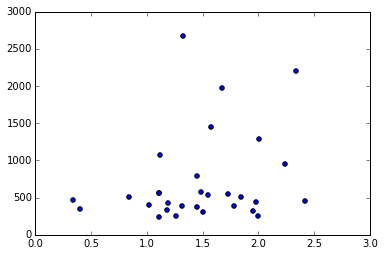

In [69]:
plt.scatter(event_df['likes/followers'], event_df['amount_raised'])
plt.show()